# Loan Eligibility Prediction 💰 using Machine Learning Models

### Import Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import scipy

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#### Loading Data Set 
After importing libraries, we will also import the dataset that will be used.


In [2]:
loan_train = pd.read_csv('loan-train.csv')
loan_test = pd.read_csv('loan-test.csv')

In [3]:
loan_train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [6]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


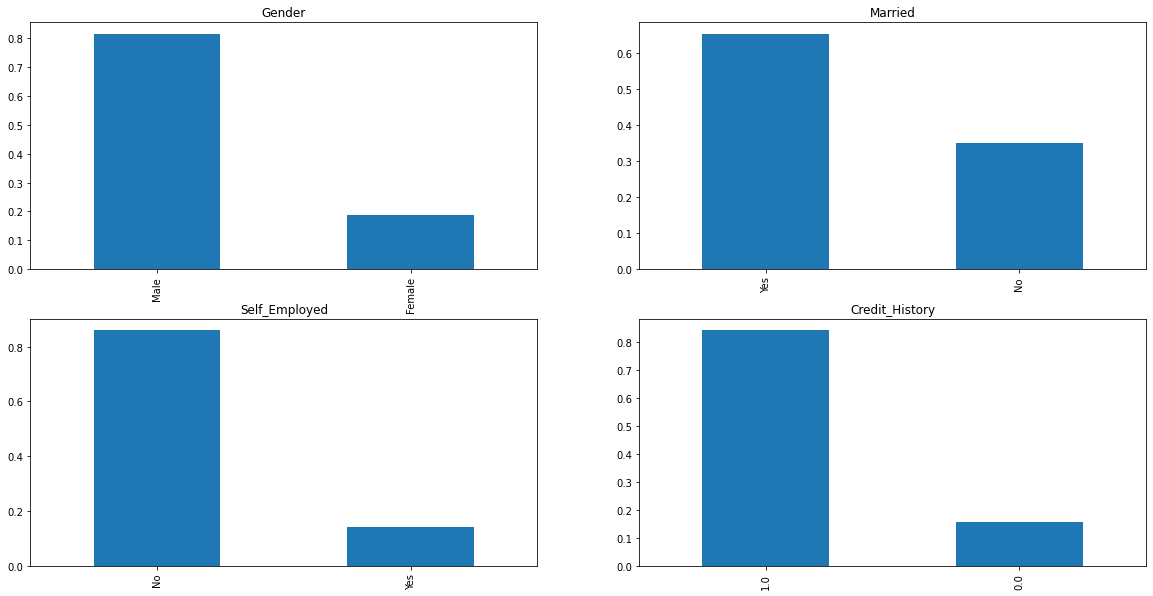

In [8]:
plt.subplot(221)
loan_train['Gender'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Gender")
plt.subplot(222)
loan_train['Married'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Married")
plt.subplot(223)
loan_train['Self_Employed'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Self_Employed")
plt.subplot(224)
loan_train['Credit_History'].value_counts(normalize='True').plot.bar(figsize=(20,10),title="Credit_History")
plt.show()

* Around 65% of the applicants in the dataset are married.
* 80% apllicants in the dataset are male. 
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

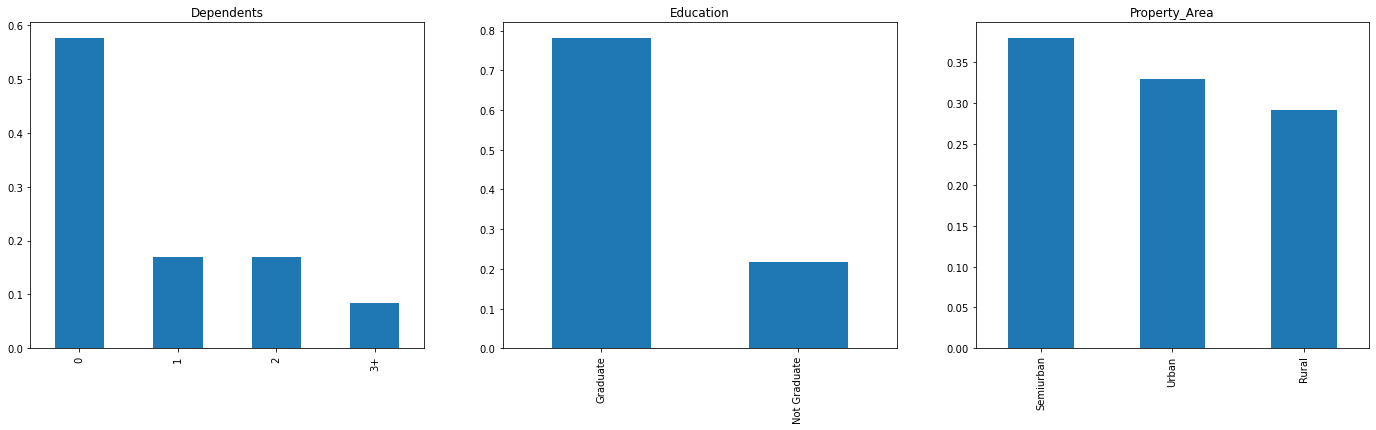

In [9]:
plt.subplot(131)
loan_train['Dependents'].value_counts(normalize='True').plot.bar(figsize=(24,6),title="Dependents")
plt.subplot(132)
loan_train['Education'].value_counts(normalize='True').plot.bar(title="Education")
plt.subplot(133)
loan_train['Property_Area'].value_counts(normalize='True').plot.bar(title='Property_Area')
plt.show()

* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

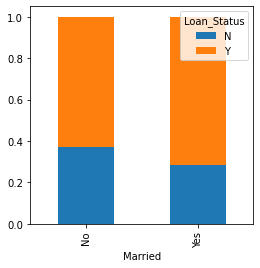

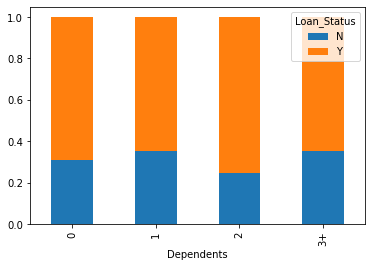

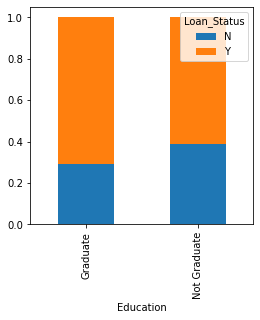

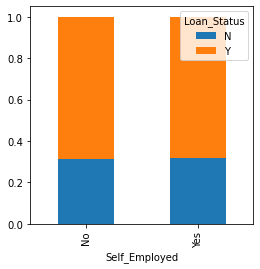

In [32]:
Married = pd.crosstab(loan_train['Married'], loan_train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Dependents = pd.crosstab(loan_train['Dependents'], loan_train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)
Education = pd.crosstab(loan_train['Education'], loan_train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
Self_Employed = pd.crosstab(loan_train['Self_Employed'], loan_train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

* Proportion of married applicants is higher for the approved loans.
* Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

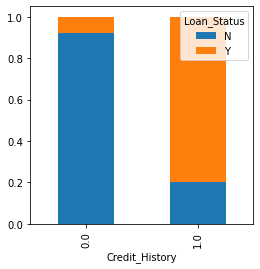

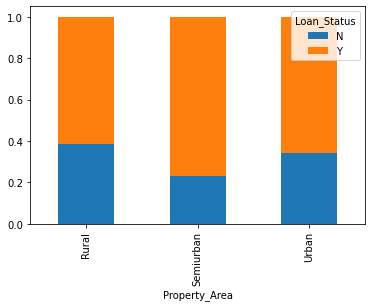

In [33]:
Credit_History=pd.crosstab(loan_train['Credit_History'],loan_train['Loan_Status'])
Property_Area=pd.crosstab(loan_train['Property_Area'],loan_train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


Looks like people with credit history as 1 are more likely to get their loans approved.Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

##### Describe Numerical Variable 
This section will show mean, count, std, min, max and others using describe function.

In [37]:
loan_train[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


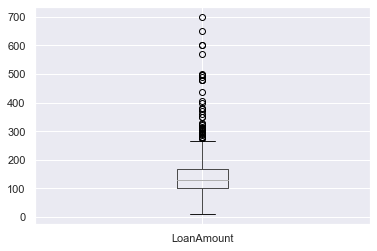

In [40]:
loan_train.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding.



Text(0.5, 0.98, '')

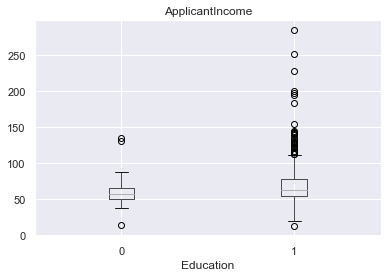

In [69]:
loan_train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

In [41]:
tmp_train = loan_train['Credit_History'].value_counts(ascending=True)
tmp2_train = loan_train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (tmp_train)

print ('\nProbility of getting loan for each Credit History class:')
print (tmp2_train)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

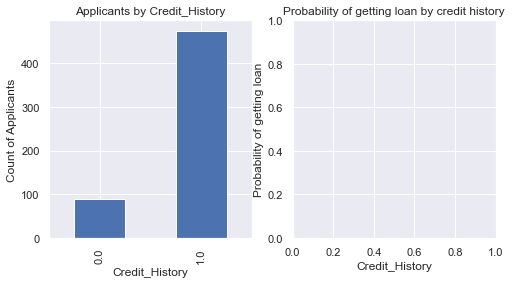

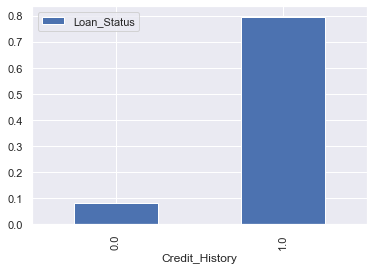

In [42]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
tmp_train.plot(kind='bar')

ax2 = fig.add_subplot(122)
tmp2_train.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

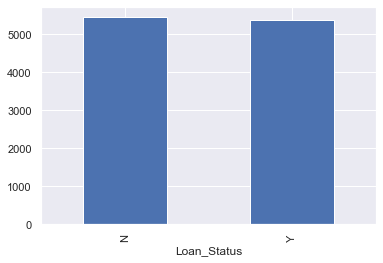

In [43]:
loan_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

any change in the mean income. So, lets make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin

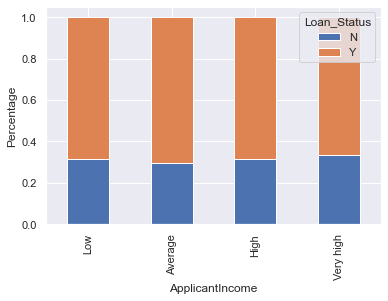

In [44]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
loan_train['Income_bin']=pd.cut(loan_train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_train['Income_bin'],loan_train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Applicant income does not affect the chances of loan approval which contradicts the hypothesis in which the assumption was that if the applicant income is high the chances of loan approval will also be high.

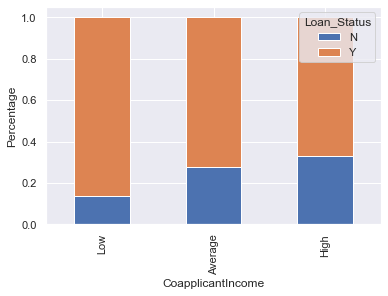

In [45]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_train['Coapplicant_Income_bin']=pd.cut(loan_train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_train['Coapplicant_Income_bin'],loan_train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It seems that if coapplicant's income is less the chances of loan approval are high. But this doesn't look right.The possible reason behind this may be that most of the applicants don't have any coapplicant so coapplicant income is 0 for such applicants and then loan approval is not dependent on

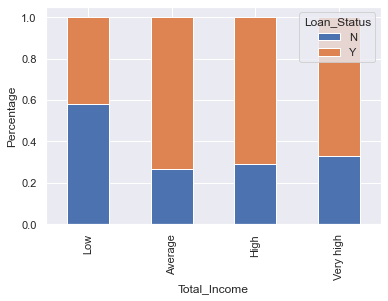

In [46]:
loan_train['Total_Income']=loan_train['ApplicantIncome']+loan_train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
loan_train['Total_Income_bin']=pd.cut(loan_train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_train['Total_Income_bin'],loan_train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

The proportion of loans approves for applicants with low Total_Income is very low compared to that of applicants with average, high and very high income.

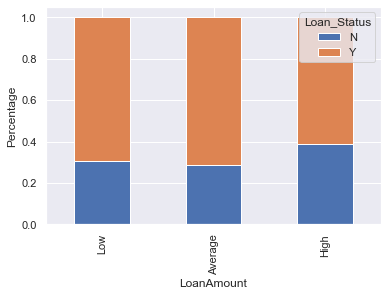

In [47]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_train['LoanAmount_bin']=pd.cut(loan_train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(loan_train['LoanAmount_bin'],loan_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

The chances of loan approval is high when the loan amount is less. It supports our hypothesis.

##### Heatmap 

There is positive correlation between Loan Amount and Applicant Income

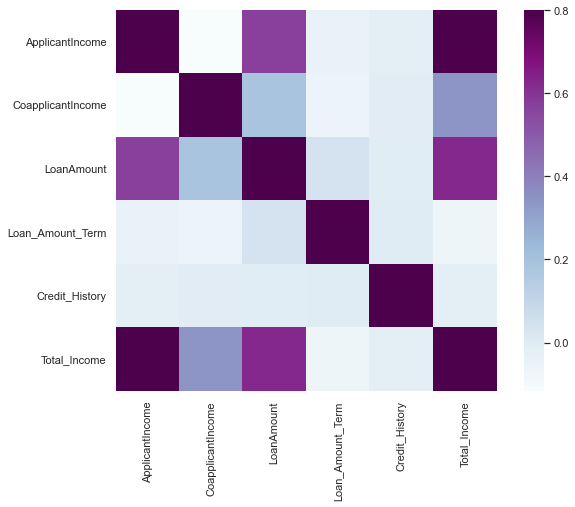

In [49]:
plt.subplots(figsize=(10,7))
sns.heatmap(loan_train.corr(), vmax=.8, square=True,cmap="BuPu");

 The darker color means those variables have more correlation. For eg. There is more correlation between (ApplicantIncome and LoanAmount) and between (Credit_History and Loan_Status). Also CoapplicantIncome has a correlation with LoanAmount.


